# Linear Systems

A $d$-dimensional first order linear homogeneous system of differential equations is of the form $\mathbf{x}' = A \mathbf{x}$ for a matrix $A$ of size $d \times d$. Solutions of such a system are determined by the eigenvalues and eigenvectors of the matrix $A$ and so let's construct solutions by computing eigenvalues and eigenvectors.

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Eigenvalues and Eigenvectors

The function `scipy.linalg.eig` computes the eigenvalues and eigenvectors of a matrix $A$. The function returns an array `evals` of eigenvalues and a matrix `evecs` of eigenvectors such that column `evecs[:,i]` corresponds to the eigenvalue `evals[i]`. Note that eigenvalues are always returned as complex numbers even if the values are (theoretically) real numbers.

For example, consider the matrix

$$
A = \begin{bmatrix} 1 & 2 \\ 2 & 1 \end{bmatrix}
$$

The characteristic polynomial is

$$
p(x) = x^2 - 2x + 3 = (x - 3)(x + 1)
$$

The eigenvalues are $\lambda_0 = 3$ and $\lambda_1 = -1$ with corresponding (unit) eigenvalues

$$
\mathbf{v}_0 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}
\hspace{20mm}
\mathbf{v}_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} -1 \\ 1 \end{bmatrix}
$$

Compute the eigenvalues and eigenvectors:

In [3]:
A = np.array([[1,2],[2,1]])
evals,evecs = la.eig(A)

In [4]:
evals

array([ 3.+0.j, -1.+0.j])

In [5]:
evecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Compute the eigenvalues and eigenvectors of the matrix

$$
A = \begin{bmatrix} 1 & -1 \\ 5 & -3 \end{bmatrix}
$$

In [6]:
A = np.array([[1,-1],[5,-3]])
evals,evecs = la.eig(A)

In [7]:
evals

array([-1.+1.j, -1.-1.j])

In [8]:
evecs

array([[0.36514837+0.18257419j, 0.36514837-0.18257419j],
       [0.91287093+0.j        , 0.91287093-0.j        ]])

## Constructing Solutions

Let $A$ be a $d \times d$ matrix with distinct eigenvalues. The general solution of the $d$-dimensional first order linear homogeneous system of differential equations $\mathbf{x}' = A \mathbf{x}$ is given by

$$
\mathbf{x}(t) = c_0 e^{\lambda_0 t} \mathbf{v}_0 + c_1 e^{\lambda_1 t} \mathbf{v}_1 + \cdots + c_{d-1} e^{\lambda_{d-1} t} \mathbf{v}_{d-1}
$$

where $\lambda_0,\lambda_1,\dots,\lambda_{d-1}$ are the eigenvalues and $\mathbf{v}_0,\mathbf{v}_1,\dots,\mathbf{v}_{d-1}$ are the corresponding eigenvectors of $A$. Note that we can write the solution as

$$
\mathbf{x}(t)
=
\begin{bmatrix}
& & & \\
\mathbf{v}_0 & \mathbf{v}_1 & \cdots & \mathbf{v}_{d-1} \\
& & &
\end{bmatrix}
\begin{bmatrix} c_0 e^{\lambda_0 t} \\ c_1 e^{\lambda_1 t} \\ \vdots \\ c_{d-1} e^{\lambda_{d-1} t} \end{bmatrix}
$$

The constants $c_0,c_1,\dots,c_{d-1}$ are determined by the initial conditions. For example

$$
\mathbf{x}(0) =
\begin{bmatrix} x_0(0) \\ x_1(0) \\ \vdots \\ x_{d-1}(0) \end{bmatrix}
=
\begin{bmatrix}
& & & \\
\mathbf{v}_0 & \mathbf{v}_1 & \cdots & \mathbf{v}_{d-1} \\
& & &
\end{bmatrix}
\begin{bmatrix} c_0 \\ c_1 \\ \vdots \\ c_{d-1} \end{bmatrix}
$$

Let $V$ be the matrix eigenvectors

$$
V = \begin{bmatrix}
& & & \\
\mathbf{v}_0 & \mathbf{v}_1 & \cdots & \mathbf{v}_{d-1} \\
& & &
\end{bmatrix}
$$

let  $C$ be the matrix with the values $c_0,\dots,c_{d-1}$ along the diagonal

$$
C = \begin{bmatrix}
c_0 &     &        & \\
    & c_1 &        & \\
    &     & \ddots & \\ 
    &     &        & c_{d-1}
\end{bmatrix}
$$

and let $\lambda$ be the vector of eigenvalues

$$
\boldsymbol{\lambda} = \begin{bmatrix} \lambda_0 \\ \lambda_1 \\ \vdots \\ \lambda_{d-1} \end{bmatrix}
$$

Then the general solution is

$$
\mathbf{x}(t) = VCe^{\boldsymbol{\lambda} t}
$$

## Function `odeLS`

Construct a function called `odeLS` which takes input parameters `A`, `x0` and `t` where:

* `A` is a square matrix (assumed to have distinct eigenvalues)

In [43]:
def odeLS(A,x0,t):
    D,V = la.eig(A)
    c = la.solve(V,x0)
    C = np.diag(c)
    x = (V@C@np.exp(np.outer(D,t))).T.real
    return x

In [44]:
A = np.array([[1,-1],[5,-3]])
D,V = la.eig(A)

In [45]:
D

array([-1.+1.j, -1.-1.j])

In [37]:
V

array([[0.36514837+0.18257419j, 0.36514837-0.18257419j],
       [0.91287093+0.j        , 0.91287093-0.j        ]])

In [38]:
x0 = [1,2]
C = la.solve(V,x0)

In [39]:
C

array([1.09544512-0.54772256j, 1.09544512+0.54772256j])

In [46]:
t = np.linspace(0,5,51)
x = (V@np.diag(C)@np.exp(np.outer(D,t))).T.real
x1 = odeLS(A,x0,t)

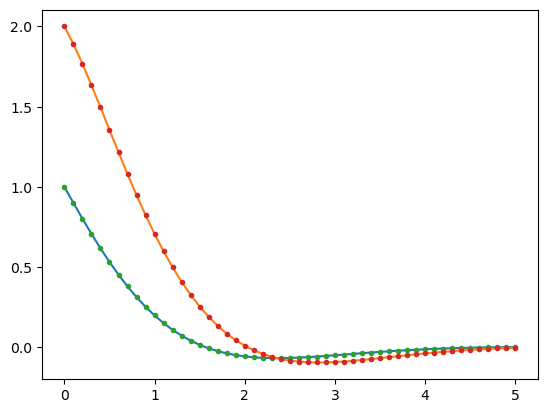

In [47]:
plt.plot(t,x)
plt.plot(t,x1,'.')